In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df=pd.DataFrame(pd.read_csv('/kaggle/input/tips-csv/tip.csv'))
print(df)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [3]:
df.shape

(244, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
df.groupby('day').count()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76
Thur,62,62,62,62,62,62


In [7]:
df2 = df.groupby('day').sum()
df2.drop('size',inplace=True,axis=1)
df2['percent'] = df2['tip'] / df2['total_bill'] * 100
df2[['total_bill','tip','percent']]

,total_bill,tip,percent
day,,,
Fri,325.88,51.96,15.944519
Sat,1778.40,260.40,14.642375
Sun,1627.16,247.39,15.203791
Thur,1096.33,171.83,15.673201


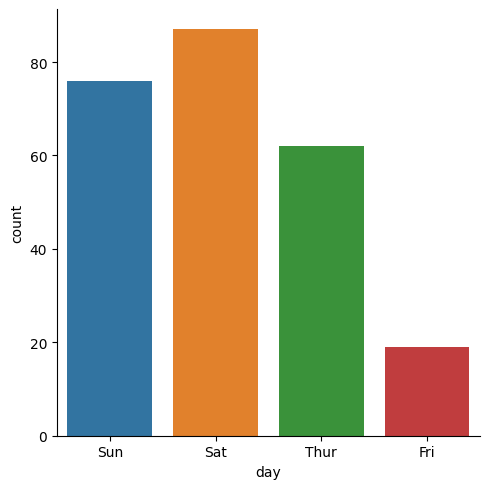

In [8]:
sns.catplot(x='day',kind='count',data=df)

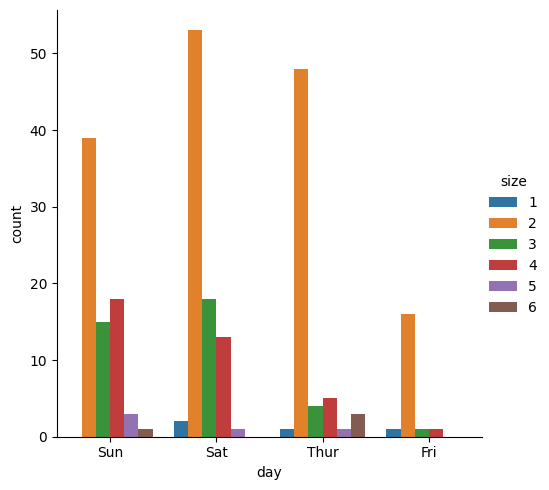

In [9]:
sns.catplot(x='day',hue='size',kind='count',data=df)

In [10]:
df.replace({'sex':{'Male':0,'Female':1},'smoker':{'No':0,'Yes':1}},inplace=True)

In [11]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,0,Sun,Dinner,2
1,10.34,1.66,0,0,Sun,Dinner,3
2,21.01,3.50,0,0,Sun,Dinner,3
3,23.68,3.31,0,0,Sun,Dinner,2
4,24.59,3.61,1,0,Sun,Dinner,4


In [12]:
# days=pd.get_dummies(df['day'])
# days.sample(5)

In [13]:
days=pd.get_dummies(df['day'])
df=pd.concat([df,days],axis=1)
df

,total_bill,tip,sex,smoker,day,time,size,Fri,Sat,Sun,Thur
0,16.99,1.01,1,0,Sun,Dinner,2,False,False,True,False
1,10.34,1.66,0,0,Sun,Dinner,3,False,False,True,False
2,21.01,3.50,0,0,Sun,Dinner,3,False,False,True,False
3,23.68,3.31,0,0,Sun,Dinner,2,False,False,True,False
4,24.59,3.61,1,0,Sun,Dinner,4,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,0,0,Sat,Dinner,3,False,True,False,False
240,27.18,2.00,1,1,Sat,Dinner,2,False,True,False,False
241,22.67,2.00,0,1,Sat,Dinner,2,False,True,False,False
242,17.82,1.75,0,0,Sat,Dinner,2,False,True,False,False


In [14]:
times=pd.get_dummies(df['time'])
df=pd.concat([df,times],axis=1)
df

,total_bill,tip,sex,smoker,day,time,size,Fri,Sat,Sun,Thur,Dinner,Lunch
0,16.99,1.01,1,0,Sun,Dinner,2,False,False,True,False,True,False
1,10.34,1.66,0,0,Sun,Dinner,3,False,False,True,False,True,False
2,21.01,3.50,0,0,Sun,Dinner,3,False,False,True,False,True,False
3,23.68,3.31,0,0,Sun,Dinner,2,False,False,True,False,True,False
4,24.59,3.61,1,0,Sun,Dinner,4,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,0,0,Sat,Dinner,3,False,True,False,False,True,False
240,27.18,2.00,1,1,Sat,Dinner,2,False,True,False,False,True,False
241,22.67,2.00,0,1,Sat,Dinner,2,False,True,False,False,True,False
242,17.82,1.75,0,0,Sat,Dinner,2,False,True,False,False,True,False


In [15]:
X=df[['sex','smoker','size','Fri','Sat','Sun','Dinner']]
Y=df[['tip']]

In [16]:
Y

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61
...,...
239,5.92
240,2.00
241,2.00
242,1.75
